In [2]:

import numpy as np
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt


2023-10-05 09:30:12.084213: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-05 09:30:13.848517: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-05 09:30:13.848623: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-05 09:30:13.853778: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-05 09:30:14.774255: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-05 09:30:14.779119: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

In [3]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)


In [4]:
model = tf.keras.models.Sequential([
tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28,1)),
tf.keras.layers.MaxPooling2D((2, 2)),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(128, activation='relu'),
tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


In [5]:
model.fit(x_train, y_train, epochs=5)
# Save the model
#model.save('handwritten_cnn.model')
# Load the model
#model = tf.keras.models.load_model('handwritten_cnn.model')



2023-10-05 09:30:42.113245: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/5
1875/1875 [==============================] - 30s 14ms/step - loss: 0.1523 - accuracy: 0.9547
Epoch 2/5
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0524 - accuracy: 0.9836
Epoch 3/5
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0332 - accuracy: 0.9896
Epoch 4/5
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0215 - accuracy: 0.9930
Epoch 5/5
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0148 - accuracy: 0.9949


In [6]:

loss, accuracy = model.evaluate(x_test, y_test)
print("Test loss:", loss)
print("Test accuracy:", accuracy)


2023-10-05 09:33:11.507440: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


313/313 [==============================] - 1s 3ms/step - loss: 0.0431 - accuracy: 0.9867
Test loss: 0.043104566633701324
Test accuracy: 0.9866999983787537


1/1 [==============================] - 0s 61ms/step
This digit is probably a 6


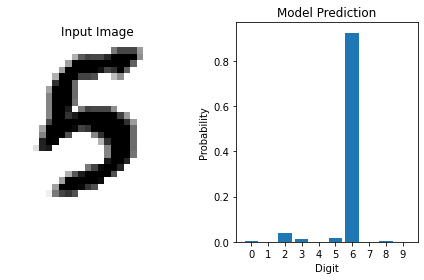

In [7]:

image_path = "img.png"
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (28, 28))
img = img / 255.0 # Normalize pixel values
img = img.reshape(1, 28, 28, 1)

prediction = model.predict(img)
predicted_digit = np.argmax(prediction)
print(f"This digit is probably a {predicted_digit}")

# Display the original image
plt.subplot(1, 2, 1)
plt.imshow(img.reshape(28, 28), cmap='gray', vmin=0, vmax=1)
plt.title('Input Image')
plt.axis('off')
# Display the model's prediction probabilities
plt.subplot(1, 2, 2)
plt.bar(range(10), prediction[0])
plt.xticks(range(10))


plt.title('Model Prediction')
plt.xlabel('Digit')
plt.ylabel('Probability')
plt.tight_layout()
plt.show()